<a href="https://colab.research.google.com/github/sulmannizami/Airline-Route-Planning---Optimizing-for-Time-and-Cost/blob/main/Airline_Route_Planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx numpy matplotlib

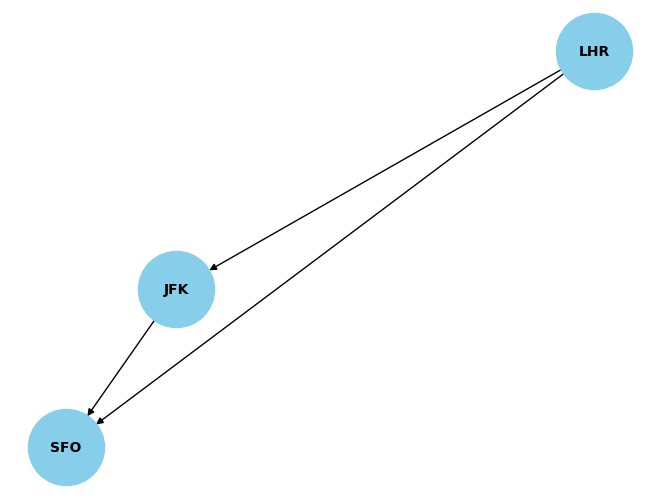

Optimal Route from LHR to SFO: ['LHR', 'JFK', 'SFO']
Total Cost: $1331.70
Total Distance: 9705 km


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the graph (airports and distances)
class AirportRoutePlanning:
    def __init__(self):
        self.graph = nx.DiGraph()

    def add_airport(self, airport_code, x, y):
        """Add an airport with its code and coordinates."""
        self.graph.add_node(airport_code, pos=(x, y))

    def add_route(self, from_airport, to_airport, distance, cost_per_km, fuel_efficiency):
        """Add a flight route with distance, cost, and fuel consumption."""
        cost = distance * cost_per_km
        self.graph.add_edge(from_airport, to_airport, distance=distance, cost=cost, fuel_efficiency=fuel_efficiency)

    def plot_airports(self):
        """Plot the airports on a map (using coordinates)."""
        pos = nx.get_node_attributes(self.graph, 'pos')
        labels = {node: node for node in self.graph.nodes()}
        nx.draw(self.graph, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
        plt.show()

    def calculate_cost(self, route):
        """Calculate the total cost of a route."""
        total_cost = 0
        total_distance = 0
        for i in range(len(route) - 1):
            edge_data = self.graph.get_edge_data(route[i], route[i + 1])
            total_cost += edge_data['cost']
            total_distance += edge_data['distance']
        return total_cost, total_distance

    def find_optimal_route(self, start_airport, end_airport):
        """Use Dijkstra’s algorithm to find the most cost-effective route."""
        shortest_path = nx.shortest_path(self.graph, source=start_airport, target=end_airport, weight='cost')
        total_cost, total_distance = self.calculate_cost(shortest_path)
        return shortest_path, total_cost, total_distance

# Step 2: Create the system and input data
if __name__ == "__main__":
    # Create the route planning object
    planner = AirportRoutePlanning()

    # Add airports (use airport code and approximate coordinates)
    planner.add_airport('LHR', 51.4700, -0.4543)  # London Heathrow
    planner.add_airport('JFK', 40.6413, -73.7781)  # New York JFK
    planner.add_airport('SFO', 37.7749, -122.4194)  # San Francisco

    # Add flight routes (distance in km, cost per km in USD, fuel efficiency in liters per km)
    planner.add_route('LHR', 'JFK', 5570, 0.15, 2.5)  # London to New York
    planner.add_route('JFK', 'SFO', 4135, 0.12, 2.0)  # New York to San Francisco
    planner.add_route('LHR', 'SFO', 8800, 0.18, 3.0)  # London to San Francisco

    # Visualize airports and routes
    planner.plot_airports()

    # Step 3: Find the optimal route from London to San Francisco
    start = 'LHR'
    end = 'SFO'
    optimal_route, total_cost, total_distance = planner.find_optimal_route(start, end)

    print(f"Optimal Route from {start} to {end}: {optimal_route}")
    print(f"Total Cost: ${total_cost:.2f}")
    print(f"Total Distance: {total_distance} km")



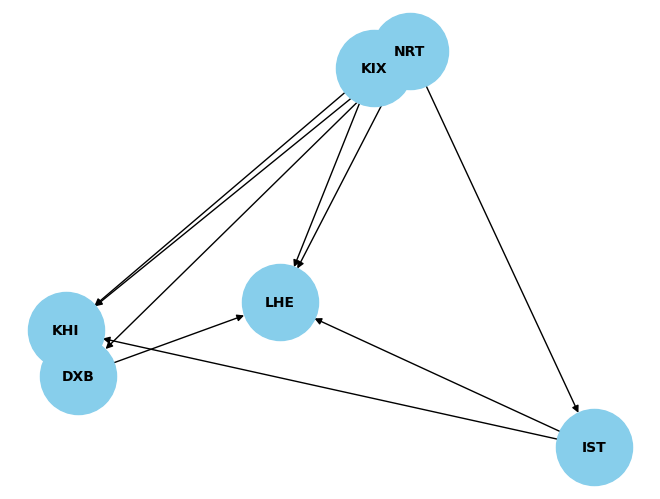

Optimal Route (Cost) from NRT to LHE: ['NRT', 'LHE']
Total Cost: $732.00, Total Time: 8.5 hours, Total Distance: 6100 km
Optimal Route (Time) from NRT to LHE: ['NRT', 'LHE']
Total Cost: $732.00, Total Time: 8.5 hours, Total Distance: 6100 km


In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

class RoutePlanner:
    def __init__(self):
        self.graph = nx.DiGraph()

    def add_airport(self, airport_code, x, y):
        """Add an airport with its code and coordinates."""
        self.graph.add_node(airport_code, pos=(x, y))

    def add_route(self, from_airport, to_airport, distance, cost_per_km, flight_time):
        """Add a flight route with distance, cost, and flight time."""
        cost = distance * cost_per_km
        self.graph.add_edge(from_airport, to_airport, distance=distance, cost=cost, flight_time=flight_time)

    def plot_airports(self):
        """Plot the airports on a map (using coordinates)."""
        pos = nx.get_node_attributes(self.graph, 'pos')
        labels = {node: node for node in self.graph.nodes()}
        nx.draw(self.graph, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
        plt.show()

    def calculate_cost(self, route):
        """Calculate the total cost and total time of a route."""
        total_cost = 0
        total_time = 0
        total_distance = 0
        for i in range(len(route) - 1):
            edge_data = self.graph.get_edge_data(route[i], route[i + 1])
            total_cost += edge_data['cost']
            total_time += edge_data['flight_time']
            total_distance += edge_data['distance']
        return total_cost, total_time, total_distance

    def find_optimal_route(self, start_airport, end_airport, optimize='cost'):
        """Find the optimal route based on either cost or time."""
        if optimize == 'cost':
            shortest_path = nx.shortest_path(self.graph, source=start_airport, target=end_airport, weight='cost')
        elif optimize == 'time':
            shortest_path = nx.shortest_path(self.graph, source=start_airport, target=end_airport, weight='flight_time')

        total_cost, total_time, total_distance = self.calculate_cost(shortest_path)
        return shortest_path, total_cost, total_time, total_distance

# Step 3: Define Airports and Routes
if __name__ == "__main__":
    planner = RoutePlanner()

    # Add airports with their coordinates (approximate)
    # Tokyo Narita (NRT), Osaka Kansai (KIX), Karachi (KHI), Lahore (LHE), Dubai (DXB), Istanbul (IST)
    planner.add_airport('NRT', 35.5494, 139.7798)  # Tokyo Narita
    planner.add_airport('KIX', 34.4271, 135.2440)  # Osaka Kansai
    planner.add_airport('KHI', 24.8775, 67.1600)   # Karachi
    planner.add_airport('LHE', 31.5216, 74.4036)   # Lahore
    planner.add_airport('DXB', 25.276987, 55.396454)  # Dubai
    planner.add_airport('IST', 41.2753, 36.7741)   # Istanbul

    # Add flight routes (distance in km, cost per km in USD, flight time in hours)
    planner.add_route('NRT', 'KHI', 6000, 0.12, 8.0)  # Tokyo to Karachi
    planner.add_route('NRT', 'LHE', 6100, 0.12, 8.5)  # Tokyo to Lahore
    planner.add_route('KIX', 'KHI', 5700, 0.11, 7.8)  # Osaka to Karachi
    planner.add_route('KIX', 'LHE', 5800, 0.11, 8.2)  # Osaka to Lahore
    planner.add_route('NRT', 'DXB', 8000, 0.10, 7.5)  # Tokyo to Dubai (as connecting hub)
    planner.add_route('DXB', 'KHI', 1200, 0.09, 2.0)  # Dubai to Karachi
    planner.add_route('DXB', 'LHE', 2000, 0.09, 3.0)  # Dubai to Lahore
    planner.add_route('NRT', 'IST', 9500, 0.11, 10.0)  # Tokyo to Istanbul
    planner.add_route('IST', 'KHI', 3500, 0.09, 4.0)  # Istanbul to Karachi
    planner.add_route('IST', 'LHE', 3600, 0.09, 4.2)  # Istanbul to Lahore

    # Plot the airports and routes
    planner.plot_airports()

    # Find optimal route from Tokyo (NRT) to Lahore (LHE) based on cost
    start = 'NRT'
    end = 'LHE'

    # Find the most cost-effective route
    optimal_route_cost, total_cost, total_time, total_distance = planner.find_optimal_route(start, end, optimize='cost')
    print(f"Optimal Route (Cost) from {start} to {end}: {optimal_route_cost}")
    print(f"Total Cost: ${total_cost:.2f}, Total Time: {total_time} hours, Total Distance: {total_distance} km")

    # Find the most time-efficient route
    optimal_route_time, total_cost_time, total_time_time, total_distance_time = planner.find_optimal_route(start, end, optimize='time')
    print(f"Optimal Route (Time) from {start} to {end}: {optimal_route_time}")
    print(f"Total Cost: ${total_cost_time:.2f}, Total Time: {total_time_time} hours, Total Distance: {total_distance_time} km")
